# maysics.equa模块使用说明

equa模块包含两个函数

|名称|作用|
|---|---|
|linear_e|线性方程组|
|ode|常微分方程|

equa模块包含一个类

|名称|作用|
|---|---|
|Scatter|离散点方程|

<br></br>
## 线性方程组：linear_e
linear_e(A, b)
<br>```A```：二维数组，方程组系数矩阵
<br>```b```：二维数组，常数项组成的行（列）矩阵

### DEMO 1-1：求解线性方程组$Ax=b$

In [1]:
import maysics as ms

A = [[1,2],
     [3,4]]
b = [[5],
     [6]]
ms.equa.linear_e(A, b)

array([[-4. ],
       [ 4.5]])

<br></br>
## 常微分方程：ode
ode(y, t_span, func, param={}, method='rk4')
<br>```y```：一维ndarray，初始解
<br>```t_span```：一维数组，需要求解的自变量点集
<br>```func```：函数类型，待求解的方程表达式
<br>```param```：字典类型，用于传递func中的其他参数，默认为空字典
<br>```method```：字符串类型，可选'rk4'和'euler'，'rk4'代表用四阶龙格-库塔法求解，'euler'代表用改进欧拉法求解

### DEMO 2-1：求解常微分方程$y^{'}=y$在$t\in[0, 10)$的数值解，初始条件为$y_{0}=1$

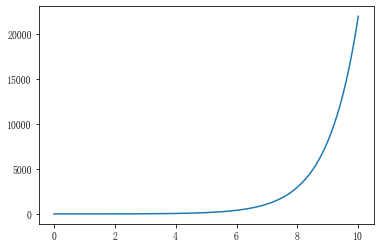

In [2]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

def func(t, y):
    return y

y = ms.equa.ode(np.array([1.]), np.linspace(0, 10, 100), func)
t = np.linspace(0, 10, 100)
plt.plot(t, y[:, 0])
plt.show()

### DEMO 2-2：求解下列常微分方程组在$t\in[0, 10)$的数值解，初始条件为$y_{0}=1, x_{0}=1$
$$
\left\{ 
    \begin{array}{lc}
        x^{'} = y\\
        y^{'} = x\\
    \end{array}
\right.
$$

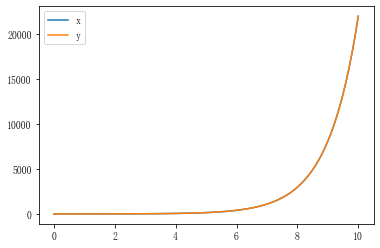

In [3]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

def func(t, y):
    return np.array([y[0], y[1]])

y = ms.equa.ode(np.array([1., 1.]), np.linspace(0, 10, 100), func)
t = np.linspace(0, 10, 100)
plt.plot(t, y[:, 0], label='x')
plt.plot(t, y[:, 1], label='y')
plt.legend()
plt.show()

### DEMO 2-3：求解常微分方程$y^{''}=10+y^{'}+y$在$t\in[0, 10)$的数值解，初始条件为$y_{0}=0, y_{0}^{'}=0$
对于二阶方程，需要作变换：$x=y^{'}$，则方程可变换为如下一阶常微分方程组：
$$
\left\{ 
    \begin{array}{lc}
        x^{'} = 10+x+y\\
        y^{'} = x\\
    \end{array}
\right.
$$

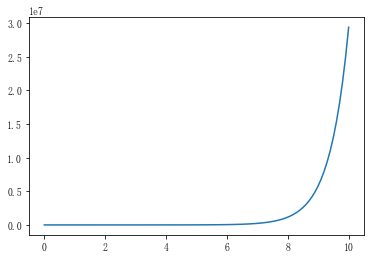

In [4]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

def func(t, y):
    return np.array([10 + y[0] + y[1],
                     y[0]])

y = ms.equa.ode(np.array([0., 0.]), np.linspace(0, 10, 100), func)
t = np.linspace(0, 10, 100)
plt.plot(t, y[:, 1])
plt.show()

<br></br>
## 散点组成的方程：Scatter
Scatter(x, y, acc=0.1, kind='linear',xtol=0.1, ytol=0.1)
<br>```x```：一维或二维数组，二维列表表示多组散点
<br>```y```：一维或二维数组，二维列表表示多组散点
<br>```acc```：浮点数类型，插值精度
<br>```kind```：浮点数类型或整型，将插值类型指定为字符串('linear'、'nearest'、'zero'、'slinear'、'squardic'、'previous'、'next'，其中'zero'、'slinear'、'squared'和'cubic'表示零阶、一阶、二阶或三阶样条曲线插值；'previous'和'next'只返回点的上一个或下一个值)或作为一个整数指定要使用的样条曲线插值器的顺序。
<br>```xtol```：浮点数类型，横坐标误差
<br>```ytol```：浮点数类型，纵坐标误差

### Scatter的方法
Scatter类下设两个可调用方法```show```、```savefig```
<br>show(scatter=False)
<br>savefig(filename, scatter=False)
<br>```filename```：字符串类型，保存的文件名
<br>```scatter```：布尔类型，True表示显示原散点，False表示不显示

### 功能说明
当散点只有一组时，求与x轴的交点
<br>当散点大于一组时，求各组散点的交点

### DEMO 3-1：一组散点组成的方程求根并绘图

方程的根为：[-1.4000000000000128, 1.3999999999999773]


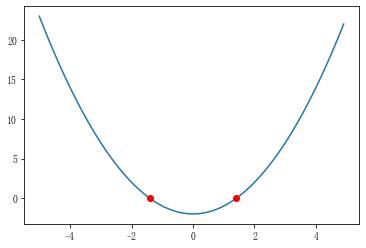

In [5]:
from maysics.equa import Scatter
import numpy as np

x = np.arange(-5, 5, 0.01)
y = x**2 - 2
scatter = Scatter(x, y)
print('方程的根为：{}'.format(scatter.root))
scatter.show()

### DEMO 3-2：两组散点组成的方程求根并绘图

方程的根为：[-1.4000000000000128, 1.3999999999999773]


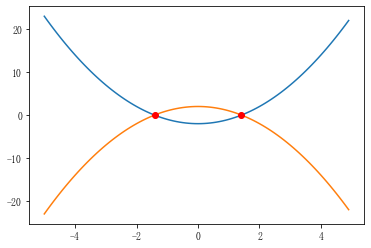

In [6]:
from maysics.equa import Scatter
import numpy as np

x1 = np.arange(-5, 5, 0.01)
y1 = x1**2 - 2
x2 = np.arange(-5, 5, 0.01)
y2 = -x2**2 + 2
X = [x1, x2]
Y = [y1, y2]
scatter = Scatter(X, Y)
print('方程的根为：{}'.format(scatter.root))
scatter.show()